# Ajustando uma curva aos dados:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from matplotlib.pyplot import figure

Dados derivados da curva de rotação.

- 'xdata' mostra a distância radial, em kpc.

- 'ydata' mostra a velocidade, em km/s.

In [2]:
# # Gás se aproximando

# xdata = np.array([47.57011774, 46.72567778, 45.88123782, 45.03679786, 44.1923579 ,
#        43.34791794, 42.50347798, 41.65903802, 40.81459806, 39.9701581 ,
#        39.12571814, 38.28127818, 37.43683822, 36.59239826, 35.7479583 ,
#        34.90351834, 34.05907838, 33.21463842, 32.37019846, 31.5257585 ,
#        30.68131854, 29.83687858, 28.99243862, 28.14799866, 27.3035587 ,
#        26.45911874, 25.61467878, 24.77023882, 23.92579886, 23.08135891,
#        22.23691895, 21.39247899, 20.54803903, 19.70359907, 18.85915911,
#        18.01471915, 17.17027919, 16.32583923, 15.48139927, 14.63695931,
#        13.79251935, 12.94807939, 12.10363943, 11.25919947, 10.41475951,
#         9.57031955,  8.72587959,  7.88143963,  7.03699967,  6.19255971,
#         5.34811975,  4.50367979,  3.65923983,  2.81479987,  1.97035991,
#         1.12591995,  0.28147999])
# d1 = xdata[::-1]

# ydata = np.array([182.77211948, 182.54741287, 183.24781132, 184.55626803,
#        185.04534251, 186.14892325, 186.71719859, 187.39119675,
#        189.51246604, 189.38691259, 190.3716312 , 185.28318843,
#        196.43797959, 192.64485422, 190.80778343, 193.37177462,
#        191.34965849, 192.43340859, 195.06346133, 191.91136417,
#        189.88924804, 190.10069367, 191.32982786, 192.96871399,
#        193.7087737 , 190.49718464, 188.19087001, 189.0367742 ,
#        188.95088201, 186.23481543, 187.4903499 , 189.21512822,
#        192.17561038, 193.43783617, 193.30571307, 193.73517399,
#        198.2817417 , 200.51530347, 202.35906557, 203.832737  ,
#        205.7755306 , 207.32183323, 206.70063565, 204.32825947,
#        195.56567512, 195.22210638, 192.77697733, 186.57181451,
#        184.42414493, 173.47422974, 139.8974421 , 128.12145336,
#        106.91545176,  71.48845403,  61.04075262,  55.76069486,
#         29.42001957])
# v1 = ydata[::-1]

In [3]:
# # Gás se afastando

# xdata = abs(np.array([ 0.70369997,  1.40739993,  2.1110999 ,  2.81479987,  3.51849983,
#         4.2221998 ,  4.92589977,  5.62959973,  6.3332997 ,  7.03699967,
#         7.74069963,  8.4443996 ,  9.14809957,  9.85179953, 10.5554995 ,
#        11.25919947, 11.96289943, 12.6665994 , 13.37029937, 14.07399933,
#        14.7776993 , 15.48139927, 16.18509923, 16.8887992 , 17.59249917,
#        18.29619913, 18.9998991 , 19.70359907, 20.40729903, 21.110999  ,
#        21.81469897, 22.51839893, 23.2220989 , 23.92579886, 24.62949883,
#        25.3331988 , 26.03689876, 26.74059873, 27.4442987 , 28.14799866,
#        28.85169863, 29.5553986 , 30.25909856, 30.96279853, 31.6664985 ,
#        32.37019846, 33.07389843, 33.7775984 , 34.48129836, 35.18499833,
#        35.8886983 , 36.59239826, 37.29609823, 37.9997982 , 38.70349816,
#        39.40719813, 40.1108981 , 40.81459806, 41.51829803, 42.221998  ,
#        42.92569796, 43.62939793, 44.3330979 , 45.03679786, 45.74049783]))
# d1 = xdata[::]

# ydata = abs(np.array([ 19.01854909,  73.58320137,  81.21580469,  85.57732706,
#         87.20295222, 102.40866697, 115.1295914 , 133.7385102 ,
#        144.6884254 , 146.81638601, 164.12341775, 177.69693769,
#        191.28359693, 193.55681996, 197.91165102, 198.6649717 ,
#        199.88096657, 201.19599294, 204.32825947, 206.70063565,
#        207.32183323, 205.7755306 , 203.832737  , 202.35906557,
#        202.12778931, 201.28845478, 198.87641733, 196.46450154,
#        193.2329602 , 193.33868301, 191.1711828 , 185.39560256,
#        182.36893719, 180.80280393, 180.25435922, 186.23481543,
#        184.70834343, 185.90438601, 189.36720362, 187.38462709,
#        185.89781635, 185.60035688, 188.56753035, 188.65342254,
#        188.8846988 , 188.17103938, 186.84275203, 186.89567427,
#        186.98156646, 186.28104635, 186.76342951, 184.4968978 ,
#        183.06276598, 181.0671718 , 181.0671718 , 177.74316861,
#        177.06904879, 176.39505063, 174.74959484, 176.98984792,
#        177.59778453, 178.44356705, 180.16177571, 178.59564245,
#        177.06247913]))
# v1 = ydata[::]

In [4]:
ydata = np.array([ 61.94602705,  72.69106626,  95.76723025, 115.1295914 ,
       123.0991938 , 132.90586699, 147.2591079 , 156.15381535,
       164.03752557, 164.03752557, 178.11982895, 191.14478251,
       190.06103241, 192.29459417, 196.13407212, 188.46180754,
       192.71091578, 195.28159828, 197.48875975, 193.06117583,
       195.68465891, 200.83247191, 197.19142194, 193.76169594,
       192.26819388, 193.01494491, 192.91579175, 189.98170988,
       189.62488017, 191.43555067, 191.50818188, 192.26162422,
       192.42671728, 191.98399538, 188.6930838 , 188.25693156,
       188.34951506, 188.34951506, 187.00796675, 186.96173583,
       188.19087001, 190.45752338, 190.29230867, 190.43769275,
       191.95759509, 193.5171587 , 194.36306288, 194.48861633,
       195.20884541, 193.95988059, 193.97971122, 193.53041967,
       193.39817491, 192.30116383, 193.40486623, 191.84530262,
       190.0874327 , 189.36720362, 189.12923604, 188.90452943,
       188.52129943, 184.85372751, 183.08928793, 179.70579285,
       180.57809732, 180.57809732, 180.57152766, 180.30715979,
       180.64415887, 180.32042077, 180.20800663, 180.8160649 ])
v1 = ydata[::]

xdata = np.array([ 1.40739993,  2.1110999 ,  2.81479987,  3.51849983,  4.2221998 ,
        4.92589977,  5.62959973,  6.3332997 ,  7.03699967,  7.74069963,
        8.4443996 ,  9.14809957,  9.85179953, 10.5554995 , 11.25919947,
       11.96289943, 12.6665994 , 13.37029937, 14.07399933, 14.7776993 ,
       15.48139927, 16.18509923, 16.8887992 , 17.59249917, 18.29619913,
       18.9998991 , 19.70359907, 20.40729903, 21.110999  , 21.81469897,
       22.51839893, 23.2220989 , 23.92579886, 24.62949883, 25.3331988 ,
       26.03689876, 26.74059873, 27.4442987 , 28.14799866, 28.85169863,
       29.5553986 , 30.25909856, 30.96279853, 31.6664985 , 32.37019846,
       33.07389843, 33.7775984 , 34.48129836, 35.18499833, 35.8886983 ,
       36.59239826, 37.29609823, 37.9997982 , 38.70349816, 39.40719813,
       40.1108981 , 40.81459806, 41.51829803, 42.221998  , 42.92569796,
       43.62939793, 44.3330979 , 45.03679786, 45.74049783, 46.4441978 ,
       47.14789776, 47.85159773, 48.5552977 , 49.25899766, 49.96269763,
       50.6663976 , 51.37009756])

d1 = xdata[::]

In [5]:
len(ydata)

72

In [6]:
# # Medidas de massa para cada respectivo raio
# s = 10.866134218471313
# x = 73473376755.62273
# massa_solar = 1.98899999999999953e+33 # em g, 1.989e+33 g = 1 massa solar

# massa = np.array([ 9.80494111095754,  10.254735082592568,  10.441770348826742,  10.559355137857033,  10.647424911162098,
#         10.710540777660611,  10.75793126496845,  10.794334013005093,  10.823753259333348,  10.84742406614548,
#         10.866134218471313,  s, s, s, s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s,s,s,s,
#         s,s])

# M = np.array([6381753129.2216, 17977529082.90676, 27654766760.90892, 36253504944.84221, 44403785903.51523,
#               51349947037.4045, 57270371461.36905, 62277332165.43141, 66642303484.01755, 70375257997.98193,
#               73473376755.62273,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x,x,x,x,
#               x,x])
# massa_solar = 1.98899999999999953e+33
# mass = []
# for i in range(len(M)):
#     mass.append(M[i]*massa_solar)

# # print(mass)

In [7]:
# raio_radio = []
# massa_radio = []
# raio_ir = []
# massa_ir = []


# for line in open('massa NGC4698.dat', 'r'):
# 	values = [float(s) for s in line.split()]
# 	raio_radio.append(values[0])
# 	massa_radio.append(values[2])
# 	raio_ir.append(values[0])
# 	massa_ir.append(values[1])
    
# # massa_radio #em log

# massa_radio_em_M_sun = []

# for i in range(len(massa_radio)):
#     massa_radio_em_M_sun.append(10**(massa_radio[i]))
    
# # massa_radio_em_M_sun

In [8]:
#G = 6.67408*10**(-11) #constante gravitacional, em m³/kg.s²
R = xdata * 3.08e+21
vc = ydata * 1e+5

Definindo a função Python a partir da equação 8.16, de Dynamics and Astrophysics of Galaxies, disponível em:
http://astro.utoronto.ca/~bovy/AST1420/notes/notebooks/07.-Flattened-Mass-Distributions.html#Some-general-considerations#


In [9]:
# TOTAL, MODELO NFW DE MATÉRIA ESCURA

def func(R,M,M_s,R_s):
    G = 6.67e-8
    a = 7.5*kpc
    return np.sqrt(((G*M*(R**2))/(((R**2)+(a**2))**(3/2))) + 
                   ((2*G*M_s*(R*(np.log((R/R_s)+1)-1)+R_s*np.log((R/R_s)+1)))/(R*(np.log(4)-1)*(R_s+R))))

massa_solar = 1.98899999999999953e+33 # em g, 1.989e+33 g = 1 massa solar
kpc = 3.086e21 # em cm, 3.08e21 cm = 1 kpc
G = 6.67e-8
a = 7.5*kpc

popt, pcov = curve_fit(func, R, vc, 
                       p0=[7e10*massa_solar,     7e11*massa_solar,     16*kpc])
#                        bounds=((1e8*massa_solar,     2*kpc,     5e11*massa_solar,     2*kpc),
#                                (1e11*massa_solar,   15*kpc,    4e12*massa_solar,     1000*kpc)))

M,M_s,R_s = popt

print('Mass (log M_d (M_sun)): ',np.log10(M/massa_solar))
print('Mass (log M_s (M_sun)): ',np.log10(M_s/massa_solar))
# print('a (kpc): ',a/kpc)
print('Raio_s (kpc): ',(R_s/kpc))

Mass (log M_d (M_sun)):  10.978019903153166
Mass (log M_s (M_sun)):  11.285198646304258
Raio_s (kpc):  33.83026255920486


# Plotando as curvas isoladamente:

In [10]:
np.log10((M+M_s)/massa_solar)

11.459249980267192

In [11]:
# Disco
disk = np.sqrt(((G*M*(R**2))/((R**2)+(a**2))**(3/2)))

# Halo
halo = np.sqrt((2*G*M_s*(R*(np.log((R/R_s)+1)-1)+R_s*np.log((R/R_s)+1)))/(R*(np.log(4)-1)*(R_s+R)))

# Plot final

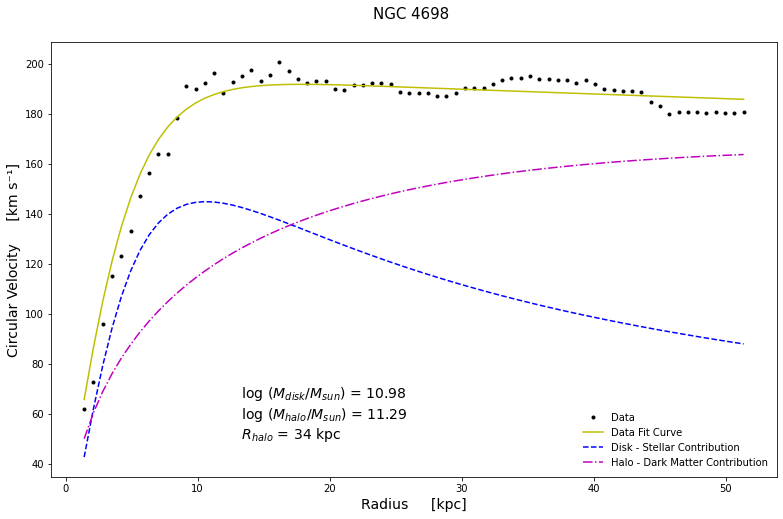

In [18]:
# Plotando as curvas

fig, ax = plt.subplots()
#plt.plot(xdata,ydata,'b.',label='Dados')
plt.plot(xdata,ydata,".",color="#000000",label="Data")
plt.plot(xdata, func(R, *popt)/1e5,'y-',label='Data Fit Curve')
plt.plot(xdata,disk/1e5,'b--',label='Disk - Stellar Contribution')
plt.plot(xdata,halo/1e5,'m-.',label='Halo - Dark Matter Contribution')
# plt.plot(d1,v1,".",color="red",label="DADOS - Blueshift")

#textstr = 'M_d=%.2f g \na=%.2f cm \nM_s=%.2f g \nR_s=%.2f cm'% tuple(popt)
#ax.text(0.25, 0.28, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
plt.gcf().set_size_inches(13, 8)
plt.title('NGC 4698 \n',fontsize = 15)
plt.xlabel("Radius     [kpc]",fontsize = 14)
#plt.xscale("log")
# plt.xlim(-5,25)
# plt.ylim(-20,180)
plt.text(13,50,' log ($M_{disk}$/$M_{sun}$) = 10.98 \n log ($M_{halo}$/$M_{sun}$) = 11.29 \n $R_{halo}$ = 34 kpc',color="k",fontsize=14)
plt.ylabel('Circular Velocity     [km s⁻¹]',fontsize=14)
plt.legend(loc="lower right",frameon=False)

plt.show()

fig.savefig('/home/natanael/Downloads/NGC 4698 RCdecomposition.png', format='png',transparent=False)

In [13]:
M = (((((1.46786e+18)**2)+((2.006e+17)**2))**(3/2))*(192.63366788650237**2))/((6.67408*10**(-20))*((1.46786e+18)**2))
print(np.log10(M/(1.989 * 10**(30))))

11.62517718392849


# Parte que tentei fazer pro pôster

No handles with labels found to put in legend.


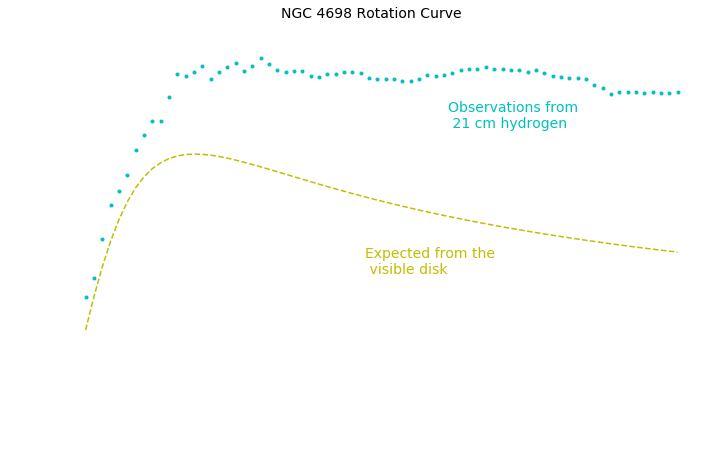

In [14]:
# Plotando as curvas

fig, ax = plt.subplots()
#plt.plot(xdata,ydata,'b.',label='Dados')
plt.plot(xdata, func(R, *popt)/1e5,'-',color="w")
plt.plot(xdata,disk/1e5,'b--','--',color="y")

# plt.plot(xdata,disk/1e5,'b--',label='Disco')
# plt.plot(xdata,halo/1e5,'m-.',label='Halo')
plt.plot(xdata,ydata,".",color="c")
# plt.plot(d1,v1,".",color="red",label="DADOS - Blueshift")

#textstr = 'M_d=%.2f g \na=%.2f cm \nM_s=%.2f g \nR_s=%.2f cm'% tuple(popt)
#ax.text(0.25, 0.28, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
plt.gcf().set_size_inches(12, 7)
plt.title('NGC 4698 Rotation Curve \n',fontsize = 14)
plt.xlabel("Radius [kpc]",fontsize = 13)
#plt.xscale("log")
# plt.xlim(-5,25)
# plt.ylim(-20,180)
plt.text(32,160,'Observations from \n 21 cm hydrogen',color="c",fontsize=14)
plt.text(25,75,'Expected from the \n visible disk',color="y",fontsize=14)

plt.ylabel('Circular Velocity [km s⁻¹]',fontsize=13)

plt.legend(loc="lower right",frameon=False)

ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('w')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.tick_params(colors='w', which='both')

plt.show()

# fig.savefig('/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Pôster/Pôster SAB 2021/NGC 4698 RC.png', format='png',transparent=True)

In [15]:
np.log10((M+M_s)/massa_solar)

11.286147694435705

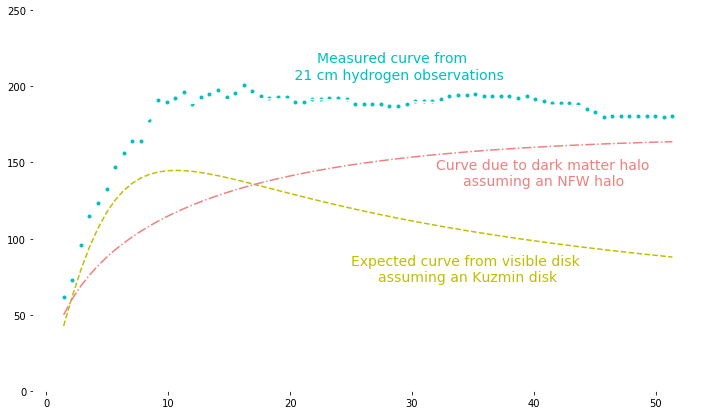

In [16]:
# Plotando as curvas

fig, ax = plt.subplots()
#plt.plot(xdata,ydata,'b.',label='Dados')
plt.plot(xdata,ydata,".",color="c",label="Data")
plt.plot(xdata, func(R, *popt)/1e5,"-",color='w',label='Data Fit Curve')
plt.plot(xdata,disk/1e5,'y--',label='Disk - Stellar Contribution')
plt.plot(xdata,halo/1e5,"-.",color='lightcoral',label='Halo - Dark Matter Contribution')
# plt.plot(d1,v1,".",color="red",label="DADOS - Blueshift")

#textstr = 'M_d=%.2f g \na=%.2f cm \nM_s=%.2f g \nR_s=%.2f cm'% tuple(popt)
#ax.text(0.25, 0.28, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
plt.gcf().set_size_inches(12, 7)
# plt.title('NGC 4698 Rotation Curve decomposition \n',fontsize = 14)
# plt.xlabel("Radius [kpc]",fontsize = 13)
#plt.xscale("log")
# plt.xlim(-5,25)
plt.ylim(0,250)
# plt.text(13,20,' log ($M_{disk}$/$M_{sun}$) = 10.95 \n log ($M_{halo}$/$M_{sun}$) = 11.35 \n $R_{effective}$ = 6.5 kpc \n $R_{halo}$ = 37 kpc',color="k",fontsize=14)
# plt.ylabel('Circular Velocity [km s⁻¹]',fontsize=13)
# plt.legend(loc="best",facecolor="w",edgecolor="w",frameon=False)
plt.text(20,205,'      Measured curve from \n 21 cm hydrogen observations',color="c",fontsize=14)
plt.text(25,72,'Expected curve from visible disk \n      assuming an Kuzmin disk',color="y",fontsize=14)
plt.text(32,135,'Curve due to dark matter halo \n      assuming an NFW halo',color="lightcoral",fontsize=14)

ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('w')
# ax.xaxis.label.set_color('w')
# ax.yaxis.label.set_color('w')
# ax.tick_params(colors='w', which='both')

plt.show()

fig.savefig('/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Pôster/Pôster SAB 2021/NGC 4698 RC decomposition final.png', format='png',transparent=True)

In [17]:
r = sqrt(L/4piF)

SyntaxError: invalid syntax (<ipython-input-17-e2bfde782070>, line 1)